In [3]:
from fastai.vision import *
from fastai import *
import cv2

In [2]:
bs = 16  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './strive-mask-dataset/'

In [3]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['bad_mask', 'mask', 'no_mask']


In [4]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 5472 training images and 1367 validation images.


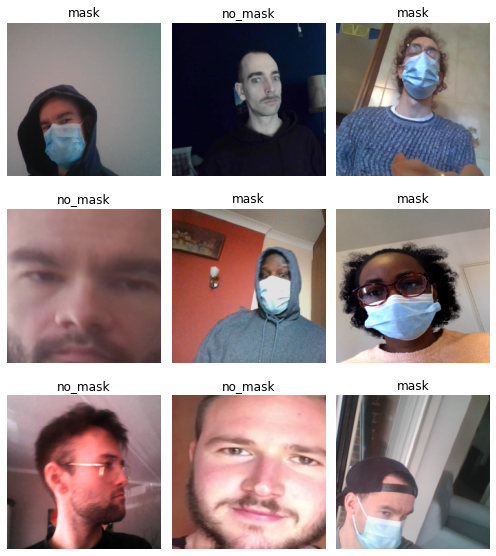

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
#learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
#learn.fit_one_cycle(10)

In [8]:
#path = './' #The path of your test image
#img = open_image(get_image_files(path)[0])
#pred_class,pred_idx,outputs = learn.predict(img)
#img.show()
#print ("It is a", pred_class)

In [9]:
#learn.export(os.path.abspath('./export.pkl'))

In [35]:
model = load_learner('./', 'export1.pkl')
face_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(0)
while (cap.isOpened()):
    _,frame = cap.read()
    frame1 = frame.copy()
    
    
    gray_frame = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    face_detect = face_classifier.detectMultiScale(gray_frame)
    
    for x,y,w,h in face_detect:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
        
    
    t = torch.tensor(np.ascontiguousarray(np.flip(frame1, 2)).transpose(2,0,1)).float()/255
    img = Image(t)
    
    
    
    
    prediction, idx, probability = model.predict(img)
    cv2.putText(frame, f'{prediction}', (20,20), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
    
    cv2.imshow('test',frame)
    
    key = cv2.waitKey(100)
    if key == ord('q') or key == 27:
        break
cap.release()
cv2.destroyAllWindows()